In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [4]:
neighborhood_data_to_load = "Redfin_Aug_2019.csv"
LatLng_data_to_load = "neighborhood_data.csv"
crimeneighbor_data_to_load = "Combined_neighborhood_crime_data.csv"

neighborhood_data = pd.read_csv(neighborhood_data_to_load)
LatLng_data = pd.read_csv(LatLng_data_to_load)
crime_neighbor_1 = pd.read_csv(crimeneighbor_data_to_load)


In [5]:
neighborhood_data

,City,Neighborhood,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,Aug-19,$295K,113,133,54
1,"Chicago, IL",Andersonville,Aug-19,$419K,94,79,50
2,"Chicago, IL",Archer Heights,Aug-19,$226K,20,31,26
3,"Chicago, IL",Archer Highlands,Aug-19,$210K,3,5,21
4,"Chicago, IL",Armour Square,Aug-19,$265K,7,20,58
...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,Aug-19,$470K,15,19,88
223,"Chicago, IL",Woodlawn,Aug-19,$199K,55,78,58
224,"Chicago, IL",Woodlawn Ridge,Aug-19,$281K,6,12,45
225,"Chicago, IL",Wrightwood,Aug-19,$397K,107,102,122


In [6]:
LatLng_data

,Unnamed: 0,City,Neighborhood,Lat,Lng
0,0,"Chicago, IL",Albany Park,41.968327,-87.728028
1,1,"Chicago, IL",Andersonville,41.981658,-87.668476
2,2,"Chicago, IL",Archer Heights,41.807900,-87.723585
3,3,"Chicago, IL",Archer Highlands,41.878114,-87.629798
4,4,"Chicago, IL",Armour Square,41.840755,-87.634019
...,...,...,...,...,...
222,222,"Chicago, IL",Wildwood,42.007024,-87.777842
223,223,"Chicago, IL",Woodlawn,41.780580,-87.591535
224,224,"Chicago, IL",Woodlawn Ridge,41.758797,-87.595823
225,225,"Chicago, IL",Wrightwood,41.745737,-87.691286


In [7]:
combined_neighborhood_LatLng = pd.merge(neighborhood_data, LatLng_data, how ="left", on="Neighborhood")
combined_neighborhood_LatLng

,City_x,Neighborhood,Month,Sale Price,Homes Sold,New Listings,Days on Market,Unnamed: 0,City_y,Lat,Lng
0,"Chicago, IL",Albany Park,Aug-19,$295K,113,133,54,0,"Chicago, IL",41.968327,-87.728028
1,"Chicago, IL",Andersonville,Aug-19,$419K,94,79,50,1,"Chicago, IL",41.981658,-87.668476
2,"Chicago, IL",Archer Heights,Aug-19,$226K,20,31,26,2,"Chicago, IL",41.807900,-87.723585
3,"Chicago, IL",Archer Highlands,Aug-19,$210K,3,5,21,3,"Chicago, IL",41.878114,-87.629798
4,"Chicago, IL",Armour Square,Aug-19,$265K,7,20,58,4,"Chicago, IL",41.840755,-87.634019
...,...,...,...,...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,Aug-19,$470K,15,19,88,222,"Chicago, IL",42.007024,-87.777842
223,"Chicago, IL",Woodlawn,Aug-19,$199K,55,78,58,223,"Chicago, IL",41.780580,-87.591535
224,"Chicago, IL",Woodlawn Ridge,Aug-19,$281K,6,12,45,224,"Chicago, IL",41.758797,-87.595823
225,"Chicago, IL",Wrightwood,Aug-19,$397K,107,102,122,225,"Chicago, IL",41.745737,-87.691286


In [8]:
summary_neighbor = combined_neighborhood_LatLng[["City_x","Neighborhood","Lat","Lng","Month","Sale Price", "Homes Sold", "New Listings","Days on Market"]]
summary_neighbor

,City_x,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,$295K,113,133,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,$419K,94,79,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,$226K,20,31,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,$210K,3,5,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,$265K,7,20,58
...,...,...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,42.007024,-87.777842,Aug-19,$470K,15,19,88
223,"Chicago, IL",Woodlawn,41.780580,-87.591535,Aug-19,$199K,55,78,58
224,"Chicago, IL",Woodlawn Ridge,41.758797,-87.595823,Aug-19,$281K,6,12,45
225,"Chicago, IL",Wrightwood,41.745737,-87.691286,Aug-19,$397K,107,102,122


In [9]:
summary_neighbor = summary_neighbor.rename(columns={"City_x":"City"})
summary_neighbor

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,$295K,113,133,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,$419K,94,79,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,$226K,20,31,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,$210K,3,5,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,$265K,7,20,58
...,...,...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,42.007024,-87.777842,Aug-19,$470K,15,19,88
223,"Chicago, IL",Woodlawn,41.780580,-87.591535,Aug-19,$199K,55,78,58
224,"Chicago, IL",Woodlawn Ridge,41.758797,-87.595823,Aug-19,$281K,6,12,45
225,"Chicago, IL",Wrightwood,41.745737,-87.691286,Aug-19,$397K,107,102,122


In [10]:
summary_neighbor.dtypes

City               object
Neighborhood       object
Lat               float64
Lng               float64
Month              object
Sale Price         object
Homes Sold         object
New Listings       object
Days on Market      int64
dtype: object

In [11]:
summary_neighbor['Sale Price']= summary_neighbor['Sale Price'].str.replace('K','')

summary_neighbor.head()

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,$295,113,133,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,$419,94,79,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,$226,20,31,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,$210,3,5,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,$265,7,20,58


In [12]:
summary_neighbor['Sale Price']= summary_neighbor['Sale Price'].str.replace('$','')

summary_neighbor.head()

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295,113,133,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419,94,79,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226,20,31,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,210,3,5,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265,7,20,58


In [13]:
summary_neighbor= summary_neighbor.astype({"Sale Price":float})
summary_neighbor.dtypes

City               object
Neighborhood       object
Lat               float64
Lng               float64
Month              object
Sale Price        float64
Homes Sold         object
New Listings       object
Days on Market      int64
dtype: object

In [14]:
summary_neighbor['Homes Sold'] = pd.to_numeric(summary_neighbor['Homes Sold'],errors='coerce')
summary_neighbor['New Listings'] = pd.to_numeric(summary_neighbor['New Listings'],errors='coerce')
summary_neighbor.dtypes

City               object
Neighborhood       object
Lat               float64
Lng               float64
Month              object
Sale Price        float64
Homes Sold        float64
New Listings      float64
Days on Market      int64
dtype: object

In [15]:
summary_neighbor

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295.0,113.0,133.0,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419.0,94.0,79.0,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20.0,31.0,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,210.0,3.0,5.0,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7.0,20.0,58
...,...,...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,42.007024,-87.777842,Aug-19,470.0,15.0,19.0,88
223,"Chicago, IL",Woodlawn,41.780580,-87.591535,Aug-19,199.0,55.0,78.0,58
224,"Chicago, IL",Woodlawn Ridge,41.758797,-87.595823,Aug-19,281.0,6.0,12.0,45
225,"Chicago, IL",Wrightwood,41.745737,-87.691286,Aug-19,397.0,107.0,102.0,122


In [16]:
summary_neighbor.to_csv("Neighborhood_LatLng.csv",encoding="utf-8", index=False)

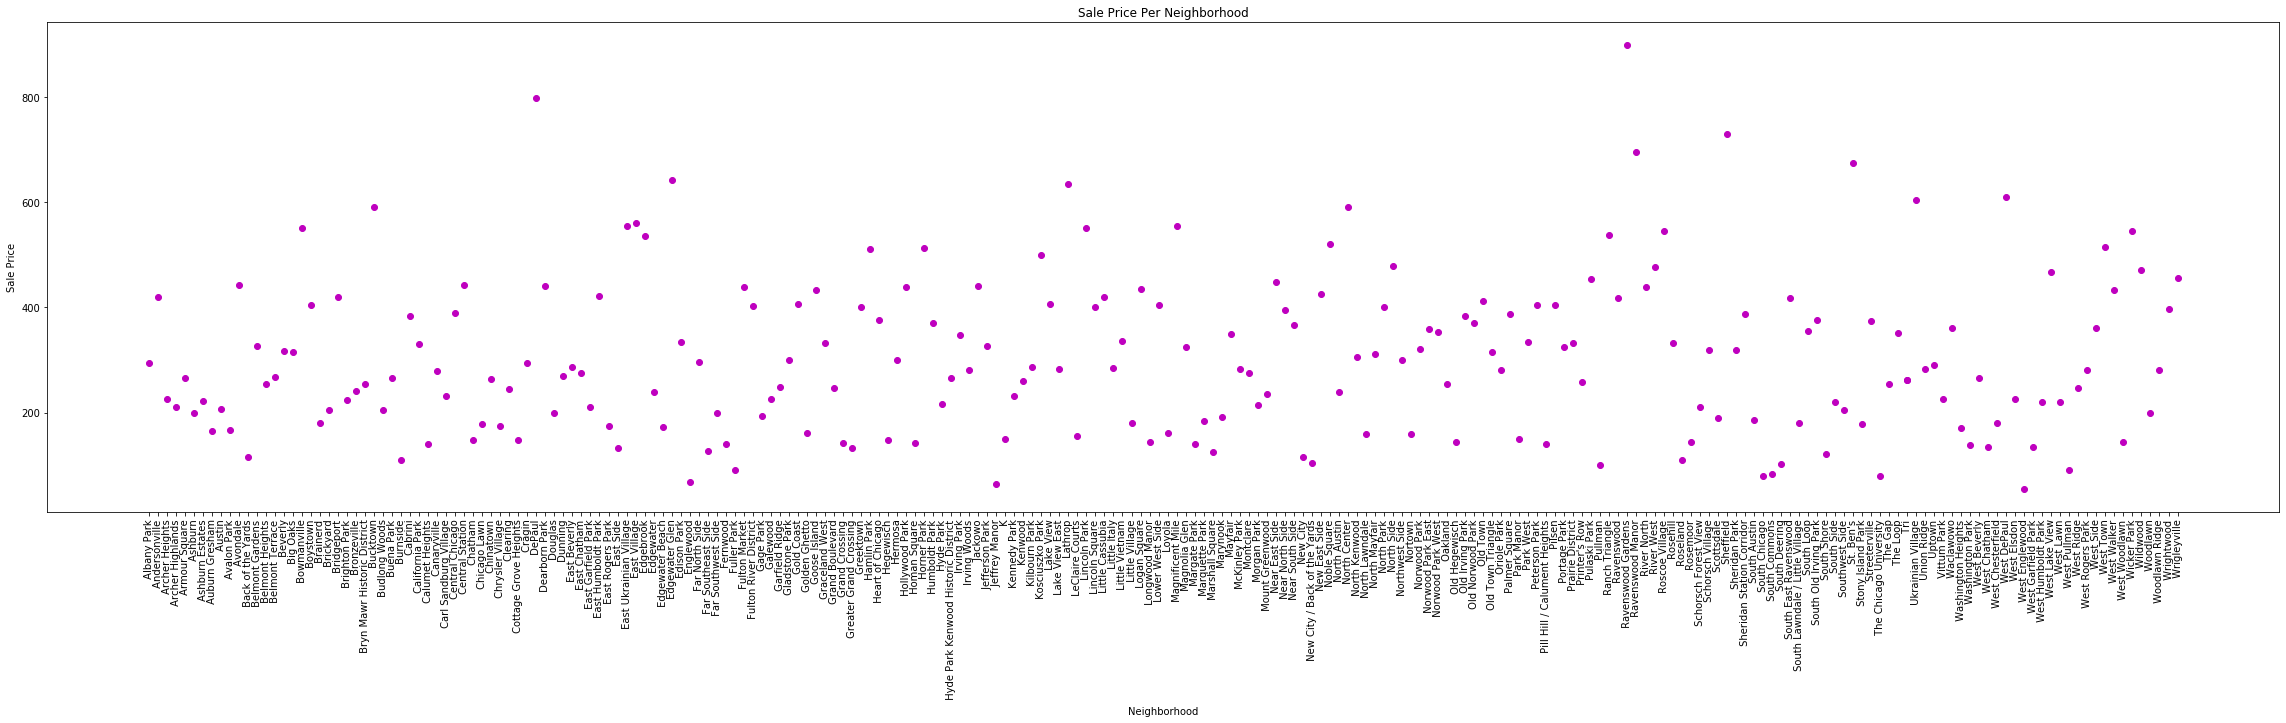

In [17]:
plt.scatter(summary_neighbor["Neighborhood"], summary_neighbor["Sale Price"], marker="o",color="m")

plt.title("Sale Price Per Neighborhood")
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout
#plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(40,9)
plt.savefig("Images/Sale Price Per Neighborhood.png")
plt.show()

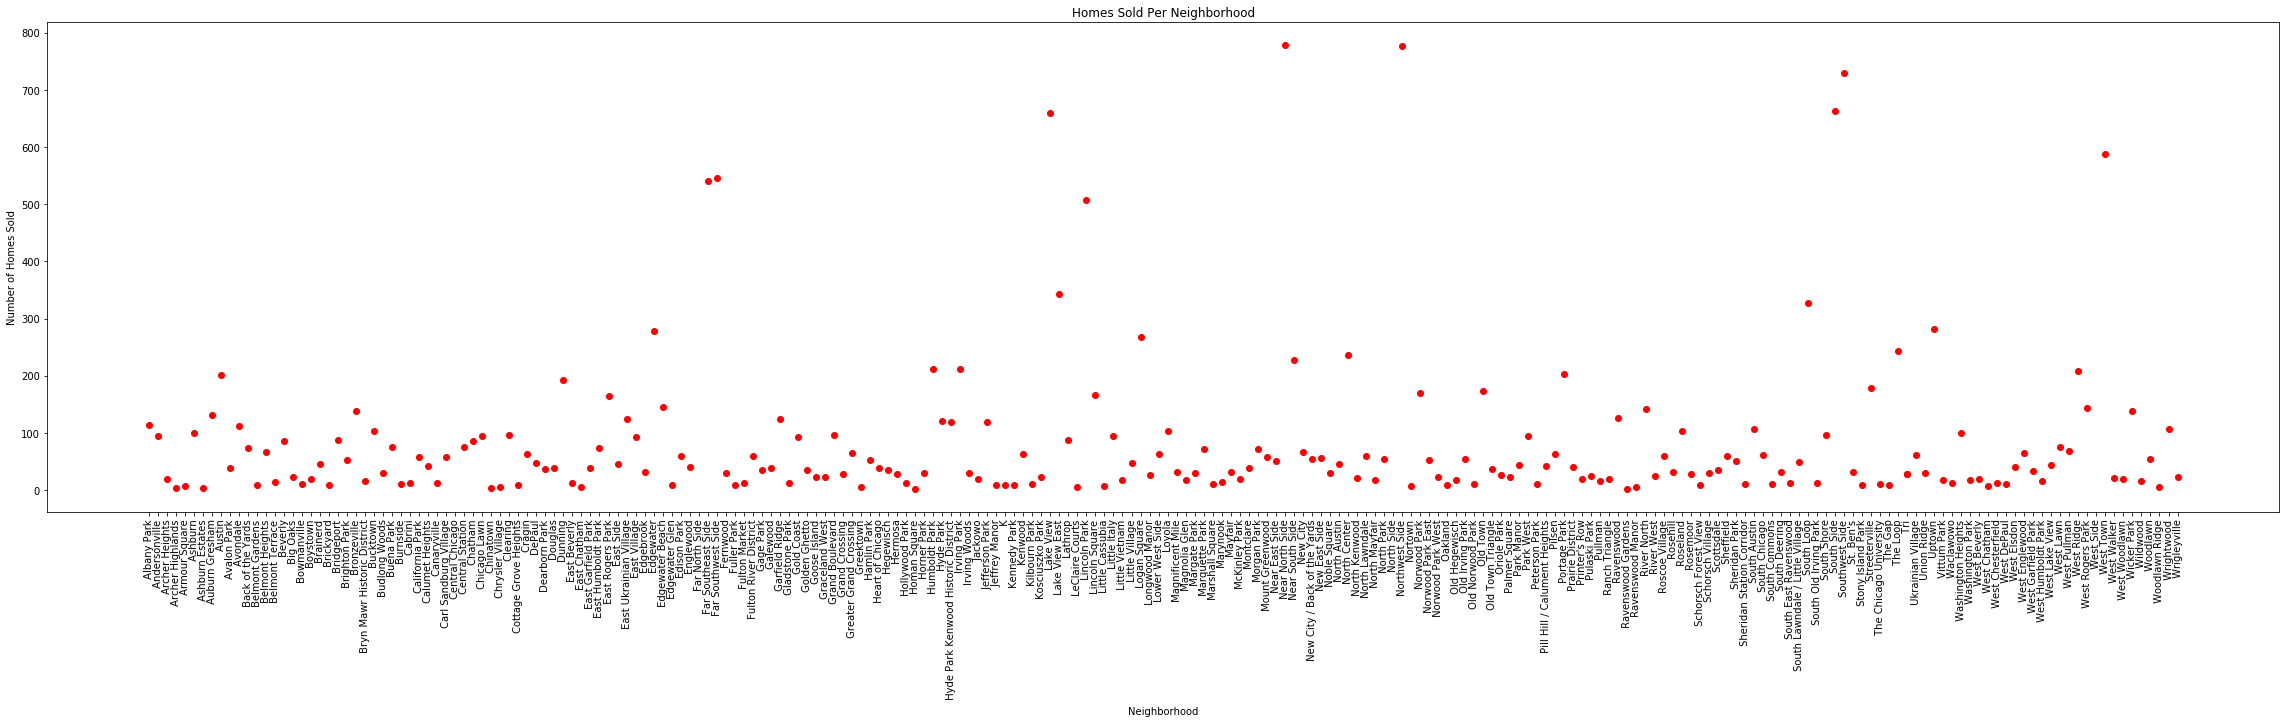

In [18]:
plt.scatter(summary_neighbor["Neighborhood"], summary_neighbor["Homes Sold"], marker="o",color="r")

plt.title("Homes Sold Per Neighborhood")
plt.ylabel("Number of Homes Sold")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout
#plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(40,9)
plt.savefig("Images/Homes Sold Per Neighborhood.png")
plt.show()

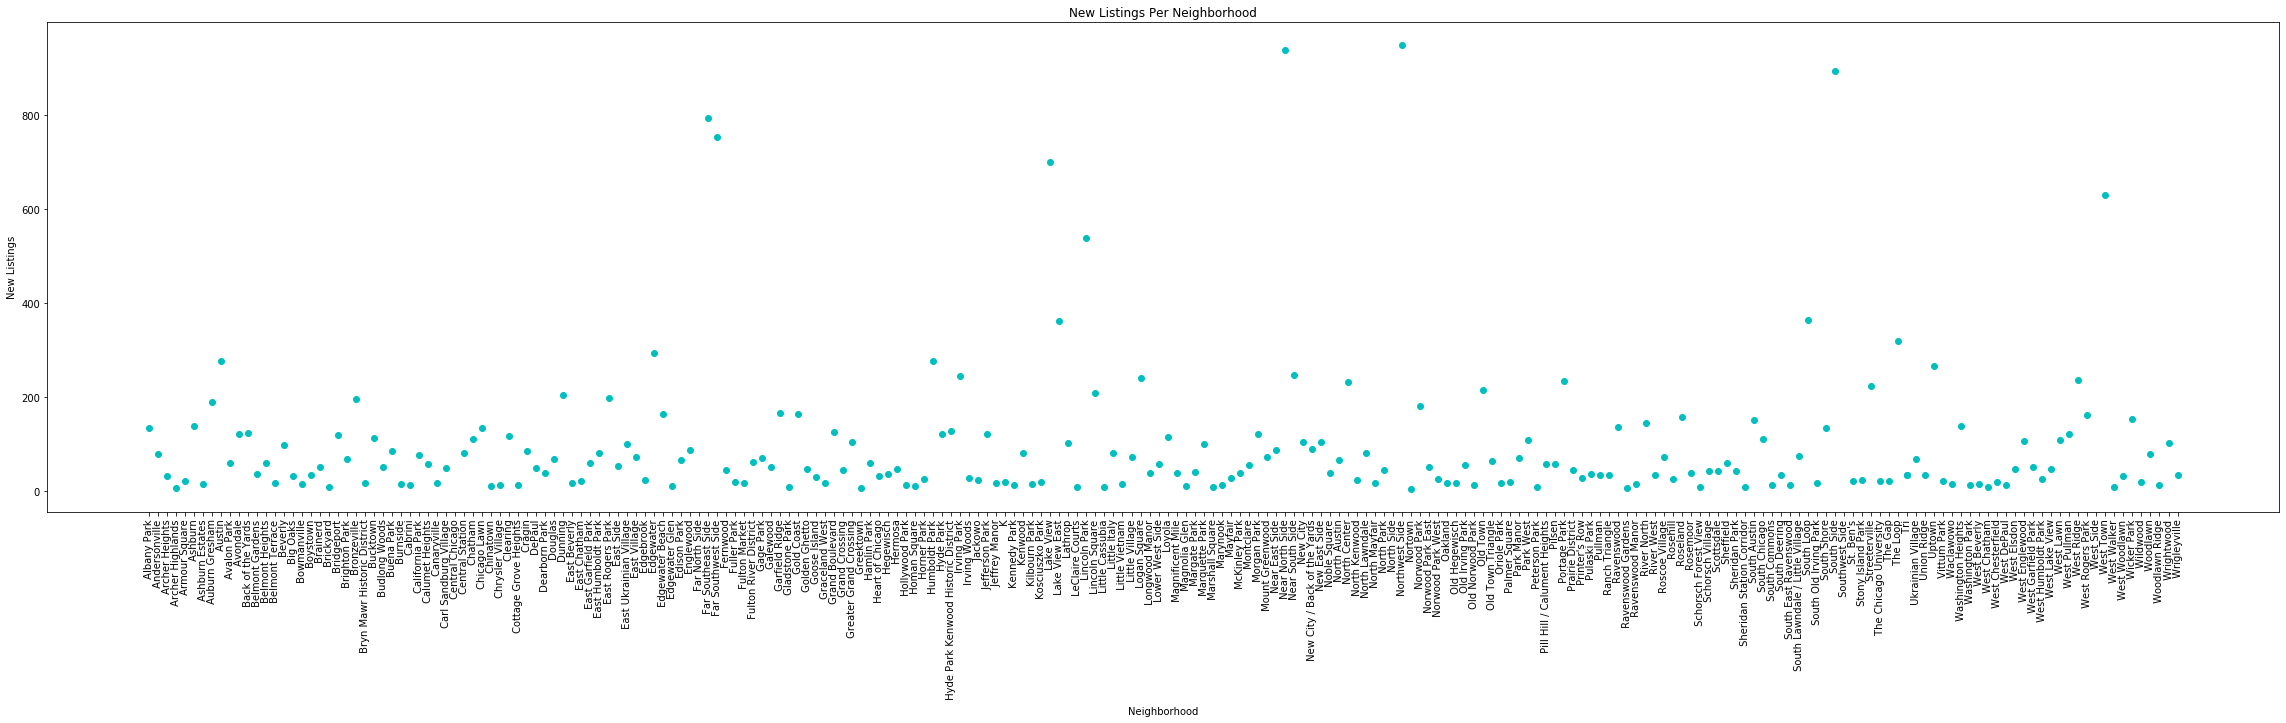

In [19]:
plt.scatter(summary_neighbor["Neighborhood"], summary_neighbor["New Listings"], marker="o",color="c")

plt.title("New Listings Per Neighborhood")
plt.ylabel("New Listings")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout
#plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(40,9)
plt.savefig("Images/New Listings Per Neighborhood.png")
plt.show()

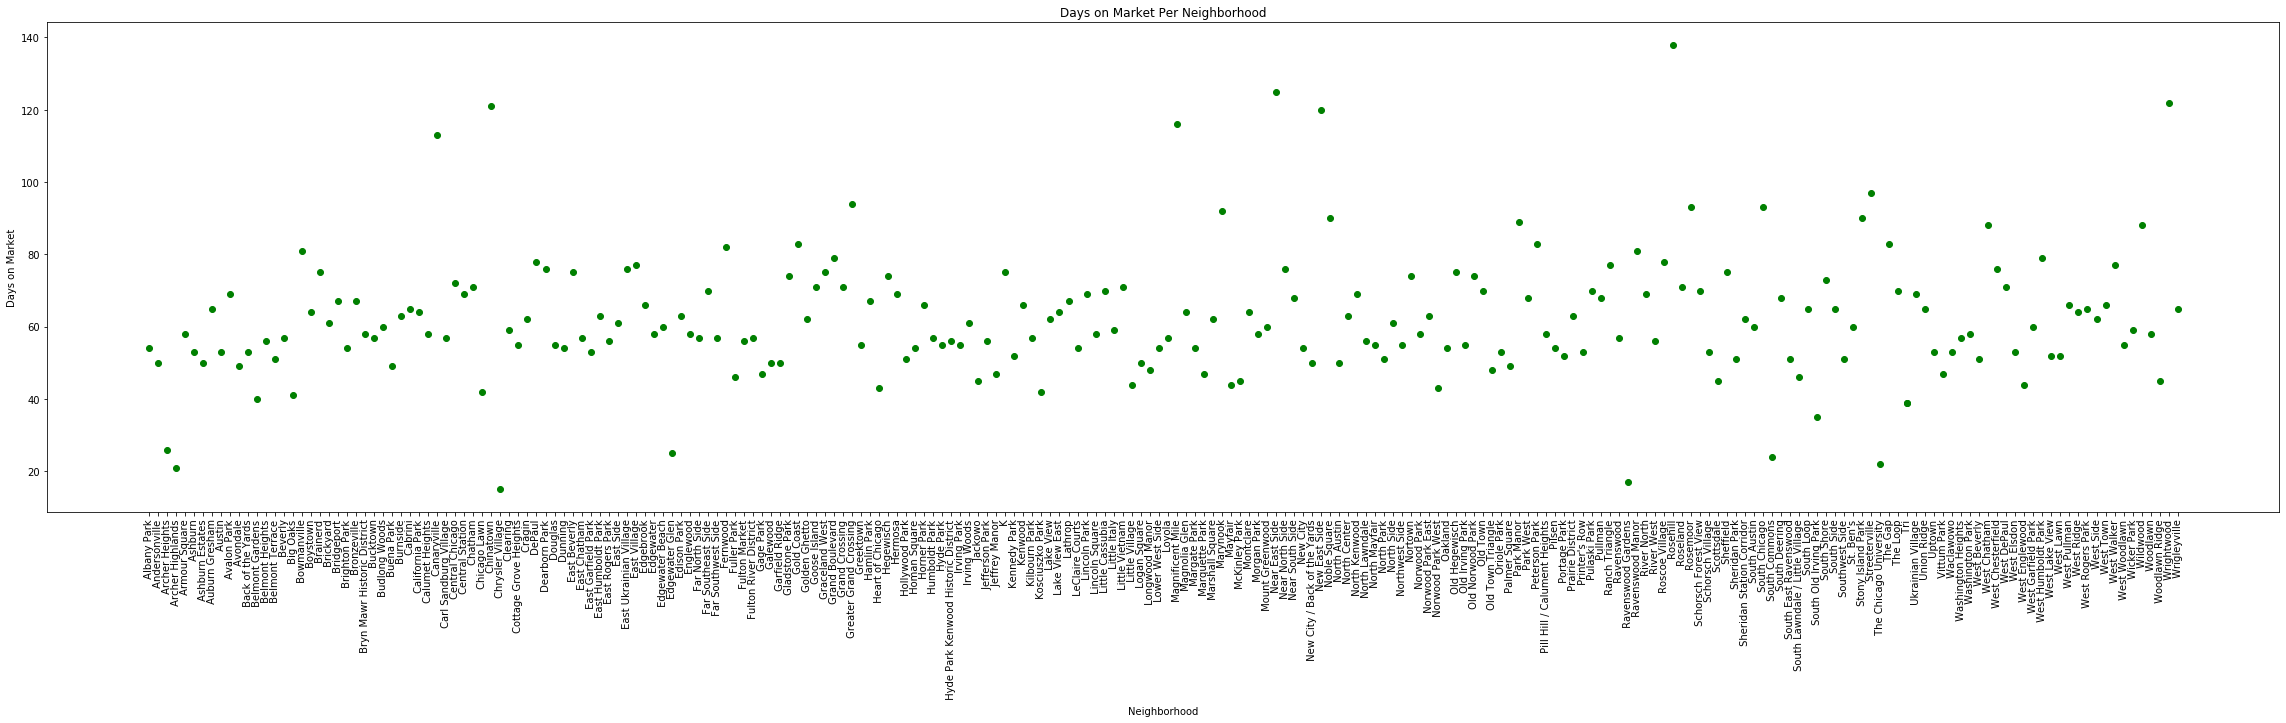

In [20]:
plt.scatter(summary_neighbor["Neighborhood"], summary_neighbor["Days on Market"], marker="o",color="g")

plt.title("Days on Market Per Neighborhood")
plt.ylabel("Days on Market")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout
#plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(40,9)
plt.savefig("Images/Days on Market Per Neighborhood.png")
plt.show()

In [21]:
crime_neighbor_1 = crime_neighbor_1[["City", "Neighborhood", "Lat","Lng","Month", "Sale Price","Homes Sold",
                                 "New Listings","Days on Market", "Crime Count"]]
crime_neighbor_1

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295.0,113,133,54,170
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419.0,94,79,50,49
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20,31,26,73
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,210.0,3,5,21,1
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7,20,58,66
...,...,...,...,...,...,...,...,...,...,...
222,"Chicago, IL",Wildwood,42.007024,-87.777842,Aug-19,470.0,15,19,88,1
223,"Chicago, IL",Woodlawn,41.780580,-87.591535,Aug-19,199.0,55,78,58,305
224,"Chicago, IL",Woodlawn Ridge,41.758797,-87.595823,Aug-19,281.0,6,12,45,1
225,"Chicago, IL",Wrightwood,41.745737,-87.691286,Aug-19,397.0,107,102,122,1


In [22]:
crime_neighbor = crime_neighbor_1.loc[(crime_neighbor_1["Crime Count"] < 1000) &
                  (crime_neighbor_1["Crime Count"] > 2)]
crime_neighbor

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295.0,113,133,54,170
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419.0,94,79,50,49
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20,31,26,73
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7,20,58,66
5,"Chicago, IL",Ashburn,41.749690,-87.712007,Aug-19,199.0,100,137,53,132
...,...,...,...,...,...,...,...,...,...,...
214,"Chicago, IL",West Pullman,41.677851,-87.641952,Aug-19,90.0,68,120,66,284
215,"Chicago, IL",West Ridge,42.000580,-87.692577,Aug-19,246.0,208,235,64,265
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
223,"Chicago, IL",Woodlawn,41.780580,-87.591535,Aug-19,199.0,55,78,58,305


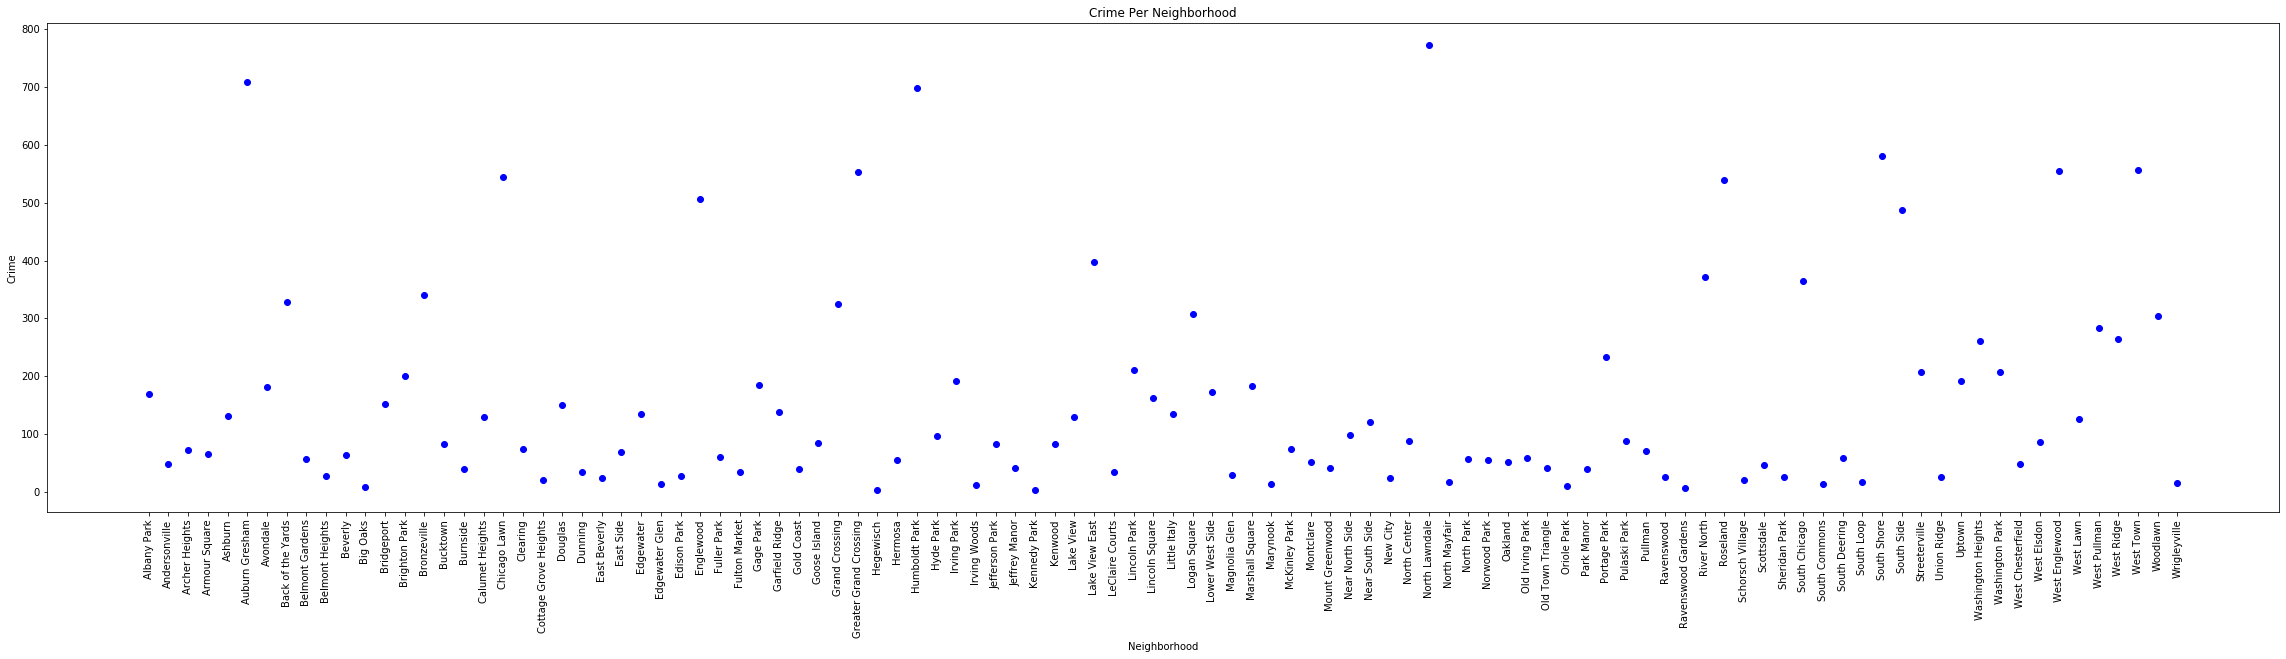

In [23]:
plt.scatter(crime_neighbor["Neighborhood"], crime_neighbor["Crime Count"], marker="o",color="b")

plt.title("Crime Per Neighborhood")
plt.ylabel("Crime")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout
#plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(40,9)
plt.savefig("Images/Crime Per Neighborhood.png")
plt.show()

In [24]:
crime_neighbor.dtypes

City               object
Neighborhood       object
Lat               float64
Lng               float64
Month              object
Sale Price        float64
Homes Sold          int64
New Listings        int64
Days on Market      int64
Crime Count         int64
dtype: object

In [25]:
top_neighbor_sale = crime_neighbor.nlargest(25,"Sale Price")
top_neighbor_sale

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14
25,"Chicago, IL",Bucktown,41.922707,-87.680275,Aug-19,590.0,103,112,57,83
133,"Chicago, IL",North Center,41.946745,-87.688257,Aug-19,590.0,236,232,63,88
104,"Chicago, IL",Lincoln Park,41.925470,-87.648778,Aug-19,550.0,508,538,69,211
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
226,"Chicago, IL",Wrigleyville,41.949062,-87.656516,Aug-19,456.0,22,34,65,16
160,"Chicago, IL",Pulaski Park,41.905108,-87.662413,Aug-19,454.0,24,36,70,88
10,"Chicago, IL",Avondale,41.941501,-87.702502,Aug-19,443.0,112,121,49,182
166,"Chicago, IL",River North,41.892385,-87.634075,Aug-19,439.0,142,144,69,372


y = -0.33x +310.68
The r-squared is: -0.2249138894939295


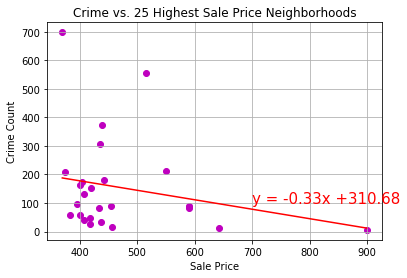

In [26]:
x_values = top_neighbor_sale['Sale Price']
y_values = top_neighbor_sale['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Highest Sale Price Neighborhoods")
plt.ylabel("Crime Count")
plt.xlabel("Sale Price")
plt.grid(True)
plt.annotate(line_eq,(700,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Highest Sale Price Neighborhoods.png")
plt.show()

In [27]:
sale_bins = [0,399.9,450,499.9,900]
group_names = ["<$399k","$400k-449k","$450k-499k",">$500k"]

In [28]:
top_neighbor_sale["Sale Price Ranges"] = pd.cut(top_neighbor_sale["Sale Price"], sale_bins, labels=group_names)
top_neighbor_sale

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count,Sale Price Ranges
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6,>$500k
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14,>$500k
25,"Chicago, IL",Bucktown,41.922707,-87.680275,Aug-19,590.0,103,112,57,83,>$500k
133,"Chicago, IL",North Center,41.946745,-87.688257,Aug-19,590.0,236,232,63,88,>$500k
104,"Chicago, IL",Lincoln Park,41.925470,-87.648778,Aug-19,550.0,508,538,69,211,>$500k
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557,>$500k
226,"Chicago, IL",Wrigleyville,41.949062,-87.656516,Aug-19,456.0,22,34,65,16,$450k-499k
160,"Chicago, IL",Pulaski Park,41.905108,-87.662413,Aug-19,454.0,24,36,70,88,$450k-499k
10,"Chicago, IL",Avondale,41.941501,-87.702502,Aug-19,443.0,112,121,49,182,$400k-449k
166,"Chicago, IL",River North,41.892385,-87.634075,Aug-19,439.0,142,144,69,372,$400k-449k


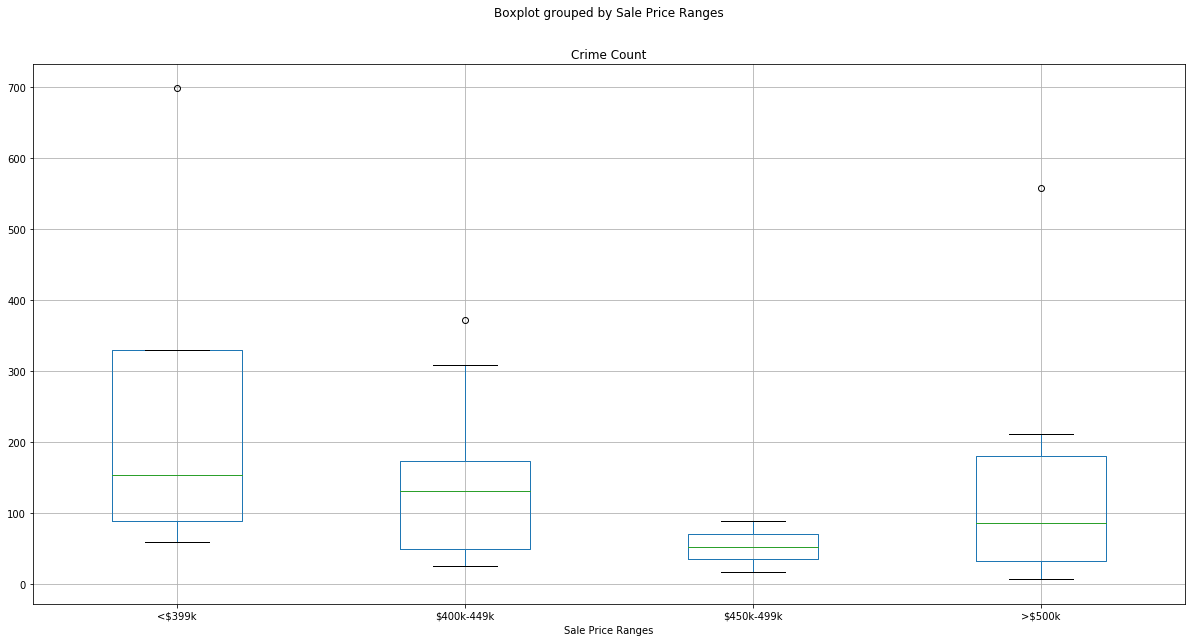

In [29]:
top_neighbor_sale.boxplot("Crime Count", by="Sale Price Ranges", figsize=(20, 10))
plt.savefig("Images/Box:Crime vs. 25 Sale Price Neighborhoods.png")

In [30]:
quartiles = top_neighbor_sale["Crime Count"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of crime count is: {lowerq}")
print(f"The upper quartile of crime count is: {upperq}")
print(f"The interquartile range of crime count is: {iqr}")
print(f"The the median of crime count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of crime count is: 49.0
The upper quartile of crime count is: 182.0
The interquartile range of crime count is: 133.0
The the median of crime count is: 88.0 
Values below -150.5 could be outliers.
Values above 381.5 could be outliers.


In [31]:
quartiles

0.25     49.0
0.50     88.0
0.75    182.0
Name: Crime Count, dtype: float64

y = -0.25x +302.58
The r-squared is: -0.13475280183414665


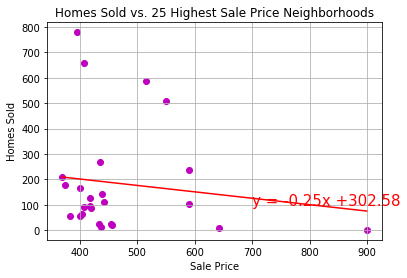

In [32]:
x_values = top_neighbor_sale['Sale Price']
y_values = top_neighbor_sale['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Highest Sale Price Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("Sale Price")
plt.grid(True)
plt.annotate(line_eq,(700,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Highest Sale Price Neighborhoods.png")
plt.show()

In [33]:
bot_neighbor_sale = crime_neighbor.nsmallest(25,"Sale Price")
bot_neighbor_sale

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
209,"Chicago, IL",West Englewood,41.778089,-87.666718,Aug-19,54.0,64,106,44,555
94,"Chicago, IL",Jeffrey Manor,41.717451,-87.561833,Aug-19,65.0,9,17,47,42
60,"Chicago, IL",Englewood,41.775305,-87.641642,Aug-19,68.0,40,87,58,506
179,"Chicago, IL",South Chicago,41.739686,-87.554418,Aug-19,79.0,62,111,93,364
180,"Chicago, IL",South Commons,41.842182,-87.620337,Aug-19,84.0,11,12,24,13
65,"Chicago, IL",Fuller Park,41.809092,-87.633376,Aug-19,90.0,8,18,46,61
214,"Chicago, IL",West Pullman,41.677851,-87.641952,Aug-19,90.0,68,120,66,284
161,"Chicago, IL",Pullman,41.707617,-87.594188,Aug-19,100.0,15,34,68,71
181,"Chicago, IL",South Deering,41.673658,-87.575337,Aug-19,103.0,32,33,68,58
170,"Chicago, IL",Roseland,41.710834,-87.623583,Aug-19,109.0,104,157,71,540


y = -0.7x +313.22
The r-squared is: -0.09223707069279474


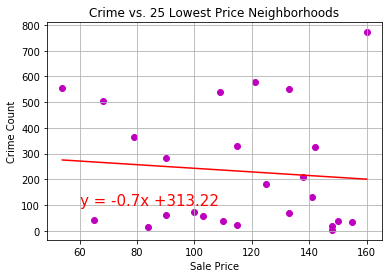

In [34]:
x_values = bot_neighbor_sale['Sale Price']
y_values = bot_neighbor_sale['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Lowest Price Neighborhoods")
plt.ylabel("Crime Count")
plt.xlabel("Sale Price")
plt.grid(True)
plt.annotate(line_eq,(60,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Lowest Price Neighborhoods.png")
plt.show()

y = -0.06x +47.62
The r-squared is: -0.06385448222252083


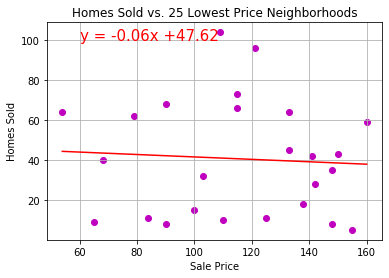

In [35]:
x_values = bot_neighbor_sale['Sale Price']
y_values = bot_neighbor_sale['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Lowest Price Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("Sale Price")
plt.grid(True)
plt.annotate(line_eq,(60,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Lowest Price Neighborhoods.png")
plt.show()

In [36]:
top_neighbor_homes = crime_neighbor.nlargest(25,"Homes Sold")
top_neighbor_homes

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
126,"Chicago, IL",Near North Side,41.903910,-87.631463,Aug-19,395.0,779,938,76,98
187,"Chicago, IL",South Side,41.805464,-87.608764,Aug-19,220.0,663,895,65,488
100,"Chicago, IL",Lake View,41.939781,-87.658927,Aug-19,407.0,659,700,62,130
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
104,"Chicago, IL",Lincoln Park,41.925470,-87.648778,Aug-19,550.0,508,538,69,211
101,"Chicago, IL",Lake View East,41.939972,-87.649275,Aug-19,283.0,343,362,64,398
184,"Chicago, IL",South Loop,41.878635,-87.625055,Aug-19,355.0,327,364,65,18
199,"Chicago, IL",Uptown,41.966540,-87.653340,Aug-19,290.0,281,265,53,192
56,"Chicago, IL",Edgewater,41.983685,-87.660114,Aug-19,240.0,278,293,58,135
110,"Chicago, IL",Logan Square,41.923060,-87.709291,Aug-19,435.0,267,240,50,308


y = 0.06x +229.71
The r-squared is: 0.0565460989395835


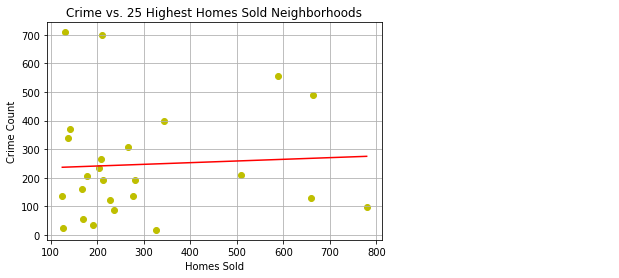

In [37]:
x_values = top_neighbor_homes['Homes Sold']
y_values = top_neighbor_homes['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Highest Homes Sold Neighborhoods")
plt.ylabel("Crime Count")
plt.xlabel("Homes Sold")
plt.grid(True)
plt.annotate(line_eq,(1000,200),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Highest Homes Sold Neighborhoods.png")
plt.show()

In [38]:
homes_bins = [0,150,200,250,300,800]
group_names = ["<150","151-200","201-250","251-300",">300"]

In [39]:
top_neighbor_homes["Homes Sold Ranges"] = pd.cut(top_neighbor_homes["Homes Sold"], homes_bins, labels=group_names)
top_neighbor_homes

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count,Homes Sold Ranges
126,"Chicago, IL",Near North Side,41.903910,-87.631463,Aug-19,395.0,779,938,76,98,>300
187,"Chicago, IL",South Side,41.805464,-87.608764,Aug-19,220.0,663,895,65,488,>300
100,"Chicago, IL",Lake View,41.939781,-87.658927,Aug-19,407.0,659,700,62,130,>300
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557,>300
104,"Chicago, IL",Lincoln Park,41.925470,-87.648778,Aug-19,550.0,508,538,69,211,>300
101,"Chicago, IL",Lake View East,41.939972,-87.649275,Aug-19,283.0,343,362,64,398,>300
184,"Chicago, IL",South Loop,41.878635,-87.625055,Aug-19,355.0,327,364,65,18,>300
199,"Chicago, IL",Uptown,41.966540,-87.653340,Aug-19,290.0,281,265,53,192,251-300
56,"Chicago, IL",Edgewater,41.983685,-87.660114,Aug-19,240.0,278,293,58,135,251-300
110,"Chicago, IL",Logan Square,41.923060,-87.709291,Aug-19,435.0,267,240,50,308,251-300


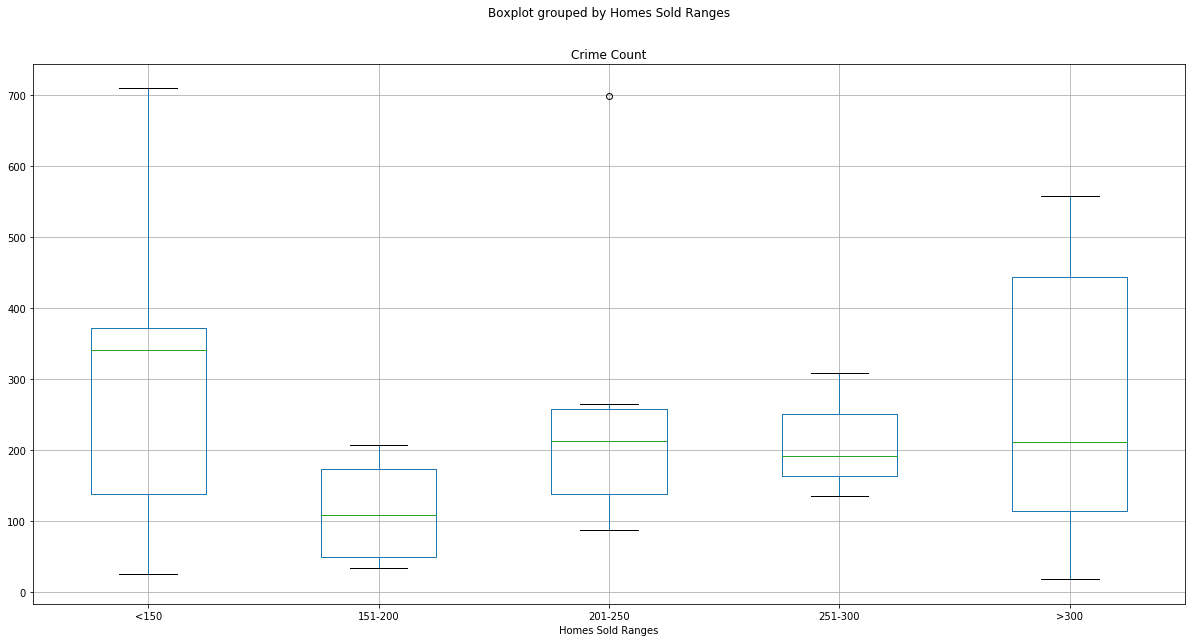

In [40]:
top_neighbor_homes.boxplot("Crime Count", by="Homes Sold Ranges", figsize=(20, 10))
plt.savefig("Images/Box:Crime vs. 25 Homes Sold Neighborhoods.png")

In [41]:
quartiles = top_neighbor_homes["Crime Count"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of crime count is: {lowerq}")
print(f"The upper quartile of crime count is: {upperq}")
print(f"The interquartile range of crime count is: {iqr}")
print(f"The the median of crime count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of crime count is: 121.0
The upper quartile of crime count is: 340.0
The interquartile range of crime count is: 219.0
The the median of crime count is: 192.0 
Values below -207.5 could be outliers.
Values above 668.5 could be outliers.


y = 0.14x +311.54
The r-squared is: 0.2503290519133642


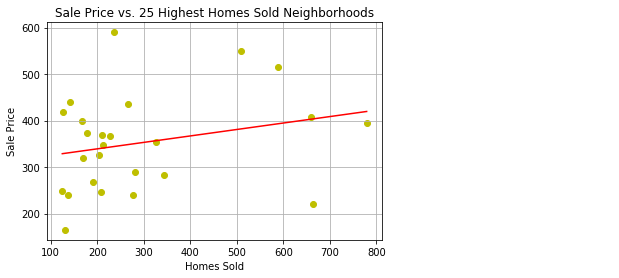

In [42]:
x_values = top_neighbor_homes['Homes Sold']
y_values = top_neighbor_homes['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Highest Homes Sold Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("Homes Sold")
plt.grid(True)
plt.annotate(line_eq,(1000,200),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Highest Homes Sold Neighborhoods.png")
plt.show()

In [43]:
bot_neighbor_homes = crime_neighbor.nsmallest(25,"Homes Sold")
bot_neighbor_homes

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6
103,"Chicago, IL",LeClaire Courts,41.810344,-87.749952,Aug-19,155.0,5,9,54,35
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7,20,58,66
12,"Chicago, IL",Belmont Gardens,41.935393,-87.729698,Aug-19,327.0,8,36,40,57
41,"Chicago, IL",Cottage Grove Heights,41.718128,-87.596431,Aug-19,148.0,8,13,55,20
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14
65,"Chicago, IL",Fuller Park,41.809092,-87.633376,Aug-19,90.0,8,18,46,61
94,"Chicago, IL",Jeffrey Manor,41.717451,-87.561833,Aug-19,65.0,9,17,47,42
96,"Chicago, IL",Kennedy Park,41.687023,-87.683461,Aug-19,232.0,9,12,52,4
144,"Chicago, IL",Oakland,41.822699,-87.601357,Aug-19,254.0,9,16,54,51


y = 1.38x +31.36
The r-squared is: 0.15466137184823114


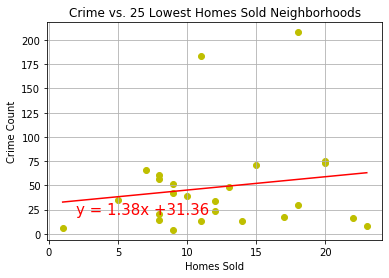

In [44]:
x_values = bot_neighbor_homes['Homes Sold']
y_values = bot_neighbor_homes['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Lowest Homes Sold Neighborhoods")
plt.ylabel("Crime Count")
plt.xlabel("Homes Sold")
plt.grid(True)
plt.annotate(line_eq,(2,20),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Lowest Homes Sold Neighborhoods.png")
plt.show()

y = -5.39x +332.28
The r-squared is: -0.1595588554588217


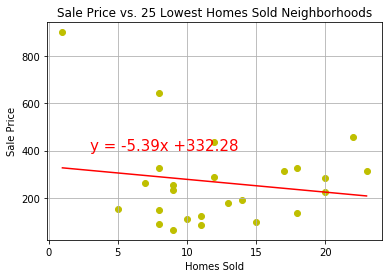

In [45]:
x_values = bot_neighbor_homes['Homes Sold']
y_values = bot_neighbor_homes['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Lowest Homes Sold Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("Homes Sold")
plt.grid(True)
plt.annotate(line_eq,(3,400),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Lowest Homes Sold Neighborhoods.png")
plt.show()

In [46]:
top_neighbor_listings = crime_neighbor.nlargest(25,"New Listings")
top_neighbor_listings

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
126,"Chicago, IL",Near North Side,41.903910,-87.631463,Aug-19,395.0,779,938,76,98
187,"Chicago, IL",South Side,41.805464,-87.608764,Aug-19,220.0,663,895,65,488
100,"Chicago, IL",Lake View,41.939781,-87.658927,Aug-19,407.0,659,700,62,130
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
104,"Chicago, IL",Lincoln Park,41.925470,-87.648778,Aug-19,550.0,508,538,69,211
184,"Chicago, IL",South Loop,41.878635,-87.625055,Aug-19,355.0,327,364,65,18
101,"Chicago, IL",Lake View East,41.939972,-87.649275,Aug-19,283.0,343,362,64,398
56,"Chicago, IL",Edgewater,41.983685,-87.660114,Aug-19,240.0,278,293,58,135
87,"Chicago, IL",Humboldt Park,41.899075,-87.721293,Aug-19,370.0,211,277,57,698
199,"Chicago, IL",Uptown,41.966540,-87.653340,Aug-19,290.0,281,265,53,192


y = 0.84x +9.34
The r-squared is: 0.9794959476598125


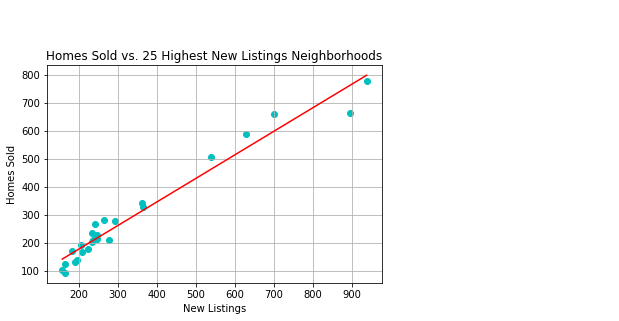

In [47]:
x_values = top_neighbor_listings['New Listings']
y_values = top_neighbor_listings['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Highest New Listings Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(1250,1000),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Highest New Listings Neighborhoods.png")
plt.show()

y = 0.12x +297.67
The r-squared is: 0.24106747309569299


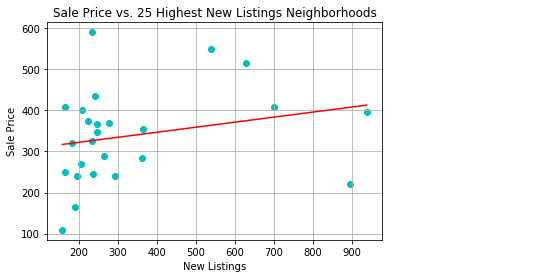

In [48]:
x_values = top_neighbor_listings['New Listings']
y_values = top_neighbor_listings['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Highest New Listings Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(1000,300),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Highest New Listings Neighborhoods.png")
plt.show()

In [49]:
top_neighbor_days = crime_neighbor.nlargest(25,"Days on Market")
top_neighbor_days

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
191,"Chicago, IL",Streeterville,41.892736,-87.620042,Aug-19,374.0,179,223,97,207
78,"Chicago, IL",Greater Grand Crossing,41.765703,-87.615251,Aug-19,133.0,64,104,94,553
179,"Chicago, IL",South Chicago,41.739686,-87.554418,Aug-19,79.0,62,111,93,364
119,"Chicago, IL",Marynook,41.739248,-87.592714,Aug-19,191.0,14,12,92,13
152,"Chicago, IL",Park Manor,41.765692,-87.615251,Aug-19,150.0,43,69,89,39
72,"Chicago, IL",Gold Coast,41.906699,-87.625331,Aug-19,407.0,92,164,83,40
126,"Chicago, IL",Near North Side,41.903910,-87.631463,Aug-19,395.0,779,938,76,98
206,"Chicago, IL",West Chesterfield,41.729148,-87.619204,Aug-19,180.0,13,19,76,48
47,"Chicago, IL",East Beverly,41.706261,-87.662993,Aug-19,287.0,12,17,75,24
82,"Chicago, IL",Hegewisch,41.655496,-87.545862,Aug-19,148.0,35,36,74,3


y = -2.57x +452.36
The r-squared is: -0.17650730410587853


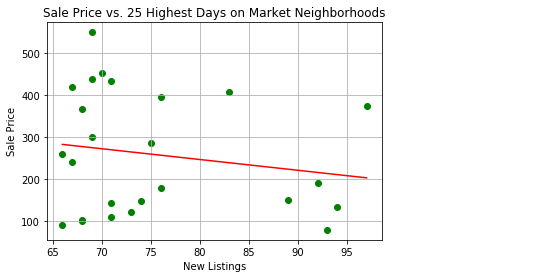

In [50]:
x_values = top_neighbor_days['Days on Market']
y_values = top_neighbor_days['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Highest Days on Market Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(100,300),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Highest Days on Market Neighborhoods.png")
plt.show()

In [51]:
days_bins = [65,70,75,80,100]
group_names = ["65-70","71-75","76-80",">80"]

In [52]:
top_neighbor_days["Days on Market Ranges"] = pd.cut(top_neighbor_days["Days on Market"], days_bins, labels=group_names)
top_neighbor_days

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count,Days on Market Ranges
191,"Chicago, IL",Streeterville,41.892736,-87.620042,Aug-19,374.0,179,223,97,207,>80
78,"Chicago, IL",Greater Grand Crossing,41.765703,-87.615251,Aug-19,133.0,64,104,94,553,>80
179,"Chicago, IL",South Chicago,41.739686,-87.554418,Aug-19,79.0,62,111,93,364,>80
119,"Chicago, IL",Marynook,41.739248,-87.592714,Aug-19,191.0,14,12,92,13,>80
152,"Chicago, IL",Park Manor,41.765692,-87.615251,Aug-19,150.0,43,69,89,39,>80
72,"Chicago, IL",Gold Coast,41.906699,-87.625331,Aug-19,407.0,92,164,83,40,>80
126,"Chicago, IL",Near North Side,41.903910,-87.631463,Aug-19,395.0,779,938,76,98,76-80
206,"Chicago, IL",West Chesterfield,41.729148,-87.619204,Aug-19,180.0,13,19,76,48,76-80
47,"Chicago, IL",East Beverly,41.706261,-87.662993,Aug-19,287.0,12,17,75,24,71-75
82,"Chicago, IL",Hegewisch,41.655496,-87.545862,Aug-19,148.0,35,36,74,3,71-75


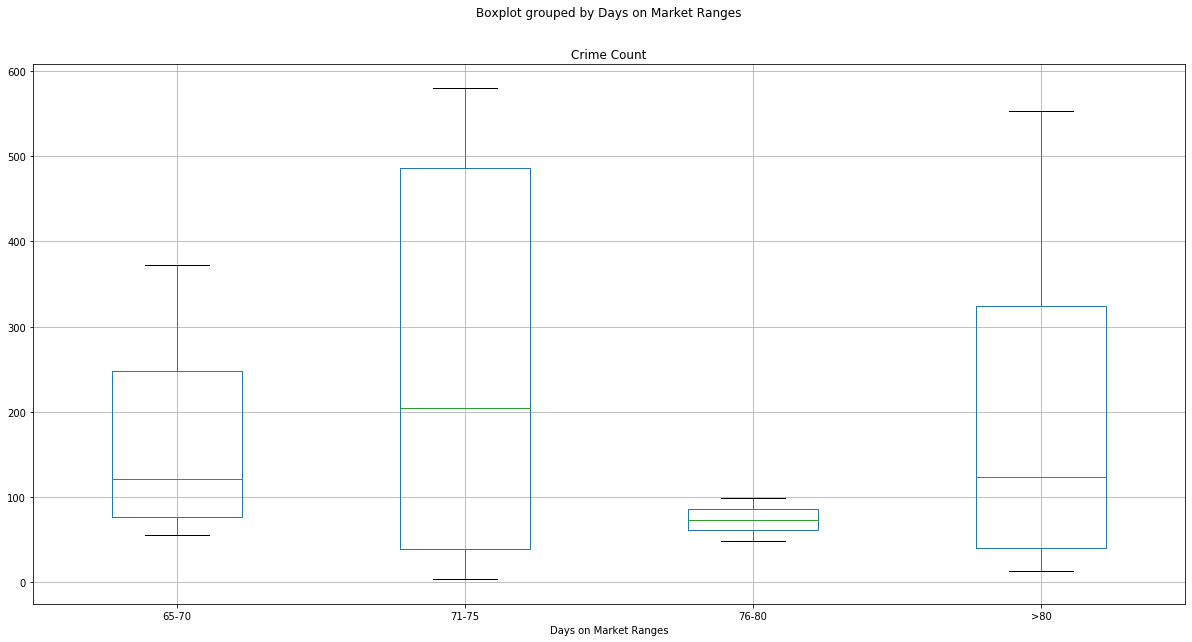

In [53]:
top_neighbor_days.boxplot("Crime Count", by="Days on Market Ranges", figsize=(20, 10))
plt.savefig("Images/Box:Crime vs. 25 Days on Market Neighborhoods.png")

In [72]:
quartiles = top_neighbor_days["Crime Count"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of crime count is: {lowerq}")
print(f"The upper quartile of crime count is: {upperq}")
print(f"The interquartile range of crime count is: {iqr}")
print(f"The the median of crime count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of crime count is: 55.0
The upper quartile of crime count is: 325.0
The interquartile range of crime count is: 270.0
The the median of crime count is: 98.0 
Values below -350.0 could be outliers.
Values above 730.0 could be outliers.


y = -0.9x +182.82
The r-squared is: -0.05141178072656853


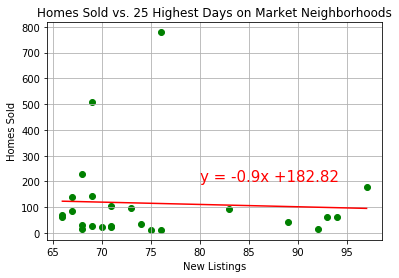

In [54]:
x_values = top_neighbor_days['Days on Market']
y_values = top_neighbor_days['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Highest Days on Market Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(80,200),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Highest Days on Market Neighborhoods.png")
plt.show()

y = 1.41x +83.69
The r-squared is: 0.07756452046691689


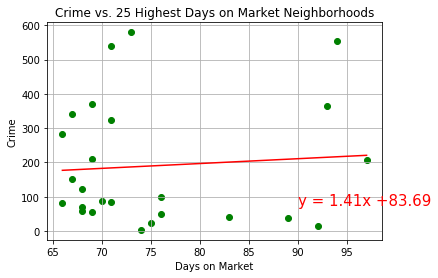

In [55]:
x_values = top_neighbor_days['Days on Market']
y_values = top_neighbor_days['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Highest Days on Market Neighborhoods")
plt.ylabel("Crime")
plt.xlabel("Days on Market")
plt.grid(True)
plt.annotate(line_eq,(90,75),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Highest Days on Market Neighborhoods.png")
plt.show()

In [56]:
bot_neighbor_days = crime_neighbor.nsmallest(25,"Days on Market")
bot_neighbor_days

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6
180,"Chicago, IL",South Commons,41.842182,-87.620337,Aug-19,84.0,11,12,24,13
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20,31,26,73
12,"Chicago, IL",Belmont Gardens,41.935393,-87.729698,Aug-19,327.0,8,36,40,57
16,"Chicago, IL",Big Oaks,41.972167,-87.798663,Aug-19,315.0,23,31,41,8
37,"Chicago, IL",Chicago Lawn,41.771839,-87.693179,Aug-19,178.0,95,133,42,545
209,"Chicago, IL",West Englewood,41.778089,-87.666718,Aug-19,54.0,64,106,44,555
121,"Chicago, IL",McKinley Park,41.831618,-87.672907,Aug-19,283.0,20,37,45,75
174,"Chicago, IL",Scottsdale,41.742041,-87.731374,Aug-19,190.0,35,42,45,47


y = -7.79x +631.47
The r-squared is: -0.420692424817596


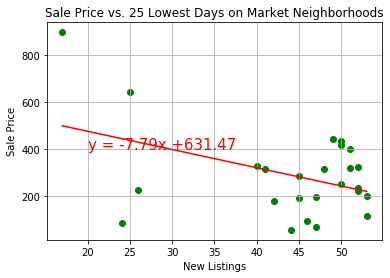

In [57]:
x_values = bot_neighbor_days['Days on Market']
y_values = bot_neighbor_days['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Lowest Days on Market Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(20,400),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Lowest Days on Market Neighborhoods.png")
plt.show()

y = 2.98x +-69.71
The r-squared is: 0.46742209911403687


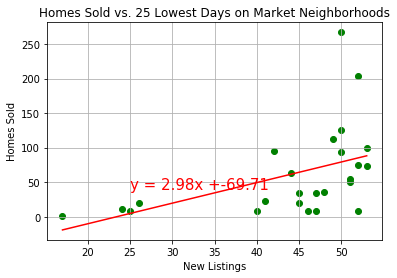

In [58]:
x_values = bot_neighbor_days['Days on Market']
y_values = bot_neighbor_days['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Lowest Days on Market Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("New Listings")
plt.grid(True)
plt.annotate(line_eq,(25,40),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Lowest Days on Market Neighborhoods.png")
plt.show()

y = 3.75x +-32.85
The r-squared is: 0.2458019894649467


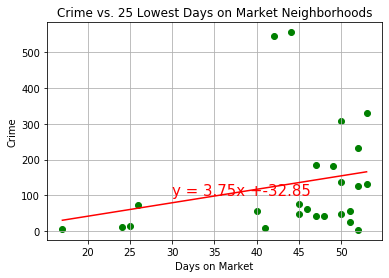

In [59]:
x_values = bot_neighbor_days['Days on Market']
y_values = bot_neighbor_days['Crime Count']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Crime vs. 25 Lowest Days on Market Neighborhoods")
plt.ylabel("Crime")
plt.xlabel("Days on Market")
plt.grid(True)
plt.annotate(line_eq,(30,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Crime vs. 25 Lowest Days on Market Neighborhoods.png")
plt.show()

In [60]:
top_neighbor_crime = crime_neighbor.nlargest(25,"Crime Count")
top_neighbor_crime

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
135,"Chicago, IL",North Lawndale,41.858978,-87.715202,Aug-19,160.0,59,81,56,772
7,"Chicago, IL",Auburn Gresham,41.743377,-87.656199,Aug-19,165.0,131,190,65,709
87,"Chicago, IL",Humboldt Park,41.899075,-87.721293,Aug-19,370.0,211,277,57,698
186,"Chicago, IL",South Shore,41.759417,-87.556028,Aug-19,121.0,96,133,73,580
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
209,"Chicago, IL",West Englewood,41.778089,-87.666718,Aug-19,54.0,64,106,44,555
78,"Chicago, IL",Greater Grand Crossing,41.765703,-87.615251,Aug-19,133.0,64,104,94,553
37,"Chicago, IL",Chicago Lawn,41.771839,-87.693179,Aug-19,178.0,95,133,42,545
170,"Chicago, IL",Roseland,41.710834,-87.623583,Aug-19,109.0,104,157,71,540
60,"Chicago, IL",Englewood,41.775305,-87.641642,Aug-19,68.0,40,87,58,506


y = -0.38x +338.87
The r-squared is: -0.31263985360836444


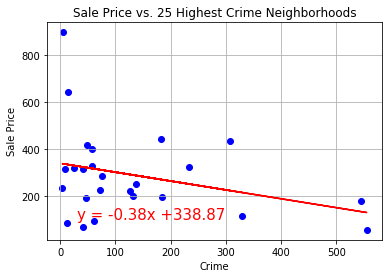

In [61]:
x_values = bot_neighbor_days['Crime Count']
y_values = bot_neighbor_days['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="b")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Highest Crime Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("Crime")
plt.grid(True)
plt.annotate(line_eq,(30,100),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Highest Crime Neighborhoods.png")
plt.show()

y = 0.21x +33.46
The r-squared is: 0.5058637463432135


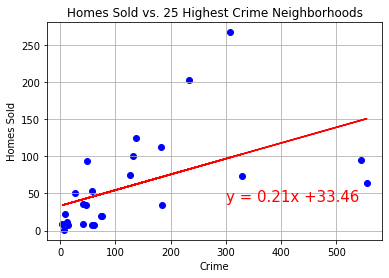

In [62]:
x_values = bot_neighbor_days['Crime Count']
y_values = bot_neighbor_days['Homes Sold']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="b")
plt.plot(x_values,regress_values,"r-")
plt.title("Homes Sold vs. 25 Highest Crime Neighborhoods")
plt.ylabel("Homes Sold")
plt.xlabel("Crime")
plt.grid(True)
plt.annotate(line_eq,(300,40),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Homes Sold vs. 25 Highest Crime Neigborhoods.png")
plt.show()

y = 0.02x +41.87
The r-squared is: 0.2458019894649467


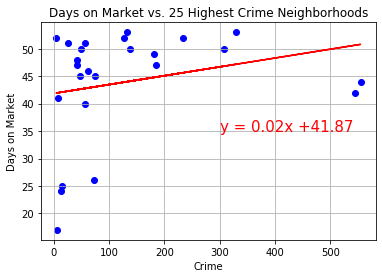

In [63]:
x_values = bot_neighbor_days['Crime Count']
y_values = bot_neighbor_days['Days on Market']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="b")
plt.plot(x_values,regress_values,"r-")
plt.title("Days on Market vs. 25 Highest Crime Neighborhoods")
plt.ylabel("Days on Market")
plt.xlabel("Crime")
plt.grid(True)
plt.annotate(line_eq,(300,35),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Days on Market vs. 25 Highest Crime Neighborhoods.png")
plt.show()

In [64]:
bot_neighbor_crime = crime_neighbor.nsmallest(25,"Crime Count")
bot_neighbor_crime

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
82,"Chicago, IL",Hegewisch,41.655496,-87.545862,Aug-19,148.0,35,36,74,3
96,"Chicago, IL",Kennedy Park,41.687023,-87.683461,Aug-19,232.0,9,12,52,4
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6
16,"Chicago, IL",Big Oaks,41.972167,-87.798663,Aug-19,315.0,23,31,41,8
150,"Chicago, IL",Oriole Park,41.976114,-87.816916,Aug-19,281.0,27,17,53,10
91,"Chicago, IL",Irving Woods,41.948676,-87.830063,Aug-19,280.0,29,27,61,12
119,"Chicago, IL",Marynook,41.739248,-87.592714,Aug-19,191.0,14,12,92,13
180,"Chicago, IL",South Commons,41.842182,-87.620337,Aug-19,84.0,11,12,24,13
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14
226,"Chicago, IL",Wrigleyville,41.949062,-87.656516,Aug-19,456.0,22,34,65,16


y = -2.57x +364.48
The r-squared is: -0.14267992530828066


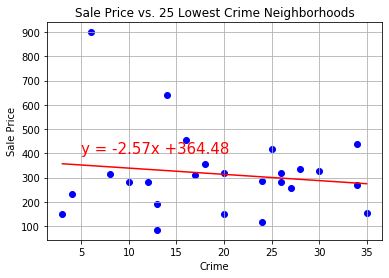

In [65]:
x_values = bot_neighbor_crime['Crime Count']
y_values = bot_neighbor_crime['Sale Price']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="b")
plt.plot(x_values,regress_values,"r-")
plt.title("Sale Price vs. 25 Lowest Crime Neighborhoods")
plt.ylabel("Sale Price")
plt.xlabel("Crime")
plt.grid(True)
plt.annotate(line_eq,(5,400),fontsize=15,color="red")
#print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Sale Price vs. 25 Lowest Crime Neighborhoods.png")
plt.show()

In [66]:
top_10_neighbor_crime = crime_neighbor.nlargest(10,"Crime Count")
top_10_neighbor_crime.dropna()
top_10_neighbor_crime

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
135,"Chicago, IL",North Lawndale,41.858978,-87.715202,Aug-19,160.0,59,81,56,772
7,"Chicago, IL",Auburn Gresham,41.743377,-87.656199,Aug-19,165.0,131,190,65,709
87,"Chicago, IL",Humboldt Park,41.899075,-87.721293,Aug-19,370.0,211,277,57,698
186,"Chicago, IL",South Shore,41.759417,-87.556028,Aug-19,121.0,96,133,73,580
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557
209,"Chicago, IL",West Englewood,41.778089,-87.666718,Aug-19,54.0,64,106,44,555
78,"Chicago, IL",Greater Grand Crossing,41.765703,-87.615251,Aug-19,133.0,64,104,94,553
37,"Chicago, IL",Chicago Lawn,41.771839,-87.693179,Aug-19,178.0,95,133,42,545
170,"Chicago, IL",Roseland,41.710834,-87.623583,Aug-19,109.0,104,157,71,540
60,"Chicago, IL",Englewood,41.775305,-87.641642,Aug-19,68.0,40,87,58,506


In [67]:
colors = (["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"])
explode = (0.2,0,0,0,0,0,0,0,0,0)

In [68]:
top_10_neighbor_crime["Colors"] = colors
top_10_neighbor_crime

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count,Colors
135,"Chicago, IL",North Lawndale,41.858978,-87.715202,Aug-19,160.0,59,81,56,772,yellow
7,"Chicago, IL",Auburn Gresham,41.743377,-87.656199,Aug-19,165.0,131,190,65,709,green
87,"Chicago, IL",Humboldt Park,41.899075,-87.721293,Aug-19,370.0,211,277,57,698,lightblue
186,"Chicago, IL",South Shore,41.759417,-87.556028,Aug-19,121.0,96,133,73,580,orange
218,"Chicago, IL",West Town,41.893595,-87.672167,Aug-19,515.0,588,629,66,557,red
209,"Chicago, IL",West Englewood,41.778089,-87.666718,Aug-19,54.0,64,106,44,555,purple
78,"Chicago, IL",Greater Grand Crossing,41.765703,-87.615251,Aug-19,133.0,64,104,94,553,pink
37,"Chicago, IL",Chicago Lawn,41.771839,-87.693179,Aug-19,178.0,95,133,42,545,yellowgreen
170,"Chicago, IL",Roseland,41.710834,-87.623583,Aug-19,109.0,104,157,71,540,lightskyblue
60,"Chicago, IL",Englewood,41.775305,-87.641642,Aug-19,68.0,40,87,58,506,lightcoral


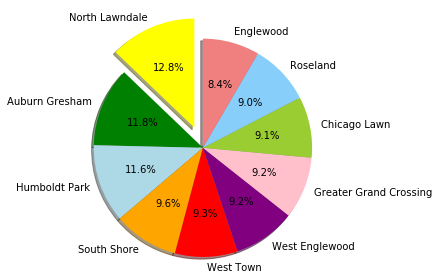

In [69]:
plt.pie(top_10_neighbor_crime['Crime Count'],
        labels=top_10_neighbor_crime['Neighborhood'], 
        colors=top_10_neighbor_crime['Colors'],
        explode=explode,
        autopct="%1.1f%%", shadow=True, 
        startangle=90)

plt.axis("equal")
plt.savefig("Images/Top10Crime.png")
plt.tight_layout()
plt.show()

In [70]:
bot_10_neighbor_crime = crime_neighbor.nsmallest(10,"Crime Count")
bot_10_neighbor_crime.dropna()
bot_10_neighbor_crime

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
82,"Chicago, IL",Hegewisch,41.655496,-87.545862,Aug-19,148.0,35,36,74,3
96,"Chicago, IL",Kennedy Park,41.687023,-87.683461,Aug-19,232.0,9,12,52,4
164,"Chicago, IL",Ravenswood Gardens,41.964741,-87.693858,Aug-19,899.0,1,7,17,6
16,"Chicago, IL",Big Oaks,41.972167,-87.798663,Aug-19,315.0,23,31,41,8
150,"Chicago, IL",Oriole Park,41.976114,-87.816916,Aug-19,281.0,27,17,53,10
91,"Chicago, IL",Irving Woods,41.948676,-87.830063,Aug-19,280.0,29,27,61,12
119,"Chicago, IL",Marynook,41.739248,-87.592714,Aug-19,191.0,14,12,92,13
180,"Chicago, IL",South Commons,41.842182,-87.620337,Aug-19,84.0,11,12,24,13
58,"Chicago, IL",Edgewater Glen,41.993025,-87.665354,Aug-19,642.0,8,10,25,14
226,"Chicago, IL",Wrigleyville,41.949062,-87.656516,Aug-19,456.0,22,34,65,16


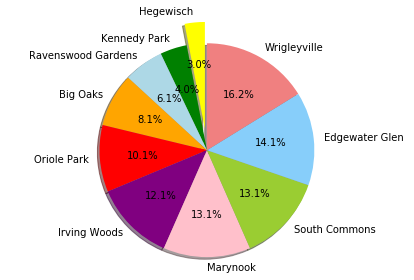

In [71]:
plt.pie(bot_10_neighbor_crime['Crime Count'],
        labels=bot_10_neighbor_crime['Neighborhood'], 
        colors=colors,
        explode=explode,
        autopct="%1.1f%%", shadow=True, 
        startangle=90)

plt.axis("equal")
plt.savefig("Images/Bot10Crime.png")
plt.tight_layout()
plt.show()